# DSC 630 - FINAL PROJECT

## Heart Watch: A Data-Driven Approach to Heart Failure Prevention

Heart disease stands as a leading cause of death in the USA, influenced by various factors. Understanding the impact of these factors can guide us in making informed choices for a healthier heart and a longer life. The dataset under analysis, sourced from the CDC, encompasses key elements such as smoking, alcohol consumption, general health, physical and mental well-being, age, race, sleep patterns, and other health indicators like diabetes, kidney health, asthma, and cancer.

Objective - This project aims to delve into the diverse factors affecting heart health, constructing a predictive model to identify potential heart diseases in patients. The goal is to provide accurate predictions, enabling early detection and timely intervention to address health issues.

Dataset - The dataset is retrieved from Kaggle.
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [2]:
## Load the data

df_heart = pd.read_csv('heart.csv')
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
#display the dimensions of the dataframe
df_heart.shape

(319795, 18)

In [4]:
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

The dataset has 319795 rows with 18 columns.

HeartDisease column will be the target for this project. There are no null values in this dataset, which means we do not have to drop any rows.


In [6]:
#get summary statistics of the non-numerical data
df_heart.describe(include = ['O'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


Most of the columns in the dataset show binary values, mainly 'Yes' and 'No.' Specifically, the 'HeartDisease' column indicates a notable imbalance, with 292,422 instances labeled as 'No' and only 27,373 instances marked 'Yes' for reported heart disease.

This imbalance is consistent across other columns, reflecting a skewed distribution in the dataset. To address this, we'll need to consider techniques such as undersampling or oversampling during the data transformation phase.

Analyzing the data distribution is a crucial initial step in understanding the dataset. This insight facilitates effective data cleaning and transformation. Visual aids like histograms, pie charts, bar graphs, and scatter plots play a vital role in visualizing and comprehending the data distribution.

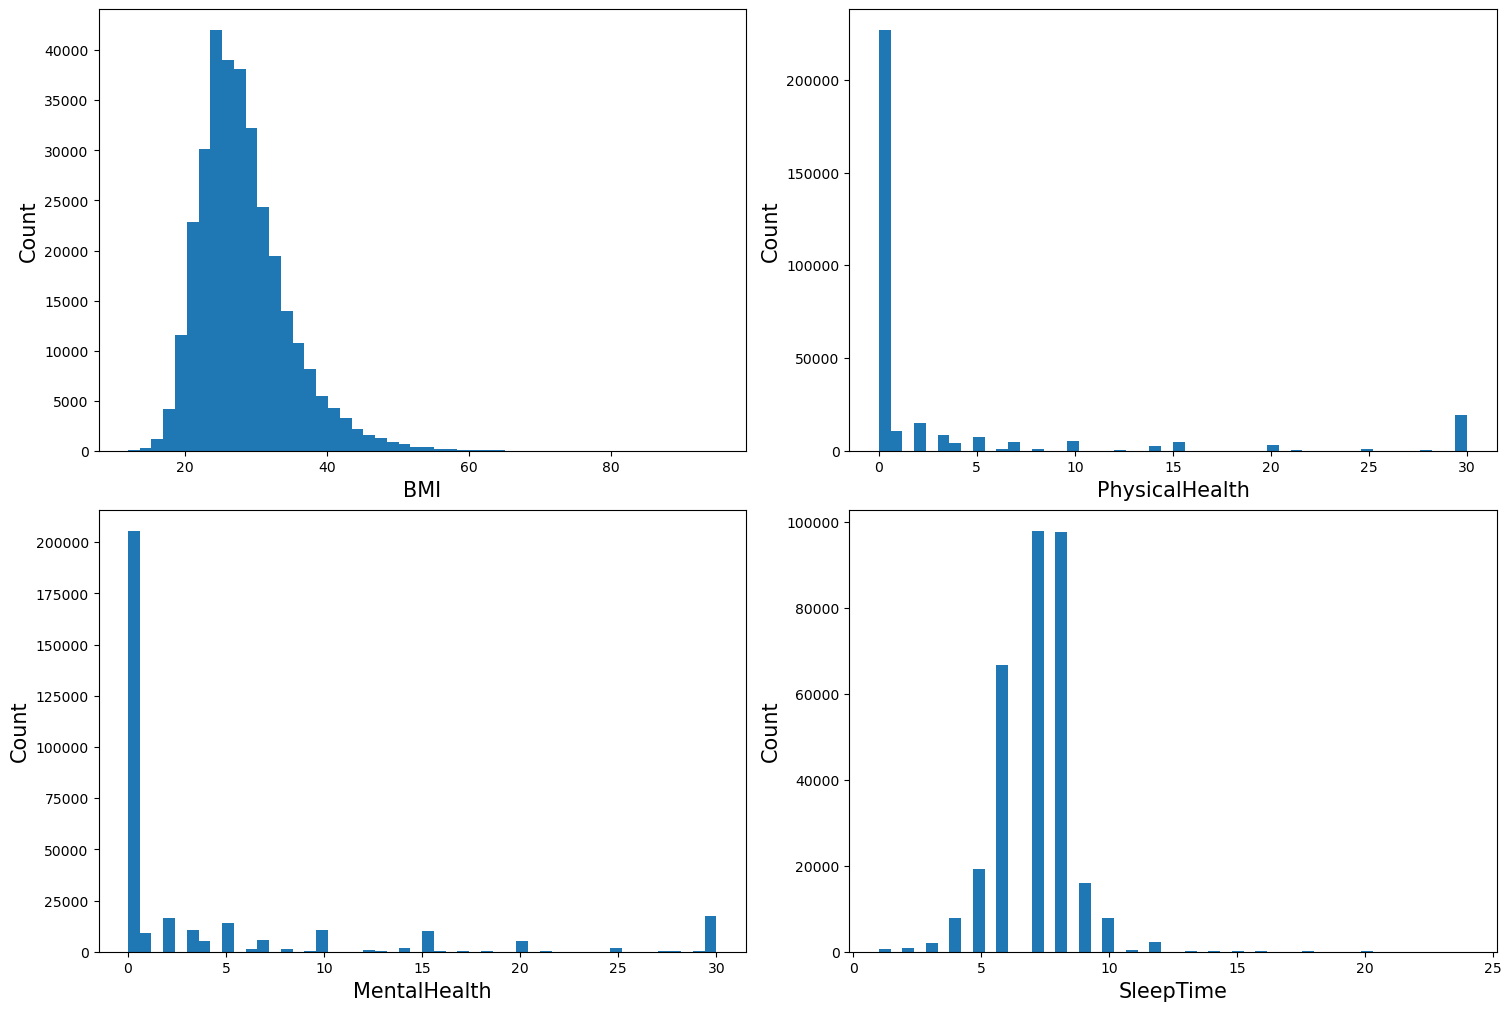

In [7]:
#get histograms of the numerical features
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 10),constrained_layout=True)

ax1.hist(df_heart['BMI'].dropna(), bins=50)
ax1.set_xlabel('BMI', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)

ax2.hist(df_heart['PhysicalHealth'].dropna(), bins=50)
ax2.set_xlabel('PhysicalHealth', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)

ax3.hist(df_heart['MentalHealth'].dropna(), bins=50)
ax3.set_xlabel('MentalHealth', fontsize=15)
ax3.set_ylabel('Count', fontsize=15)

ax4.hist(df_heart['SleepTime'].dropna(), bins=50)
ax4.set_xlabel('SleepTime', fontsize=15)
ax4.set_ylabel('Count', fontsize=15)

plt.show()

The visualizations show that the heart disease dataset is relatively healthy, with most people having a BMI in the normal range and Physical and Mental Health scores within one standard deviation of the mean. However, the Sleep Time distribution is right-skewed, with a median Sleep Time of less than 7.5 hours per night. 


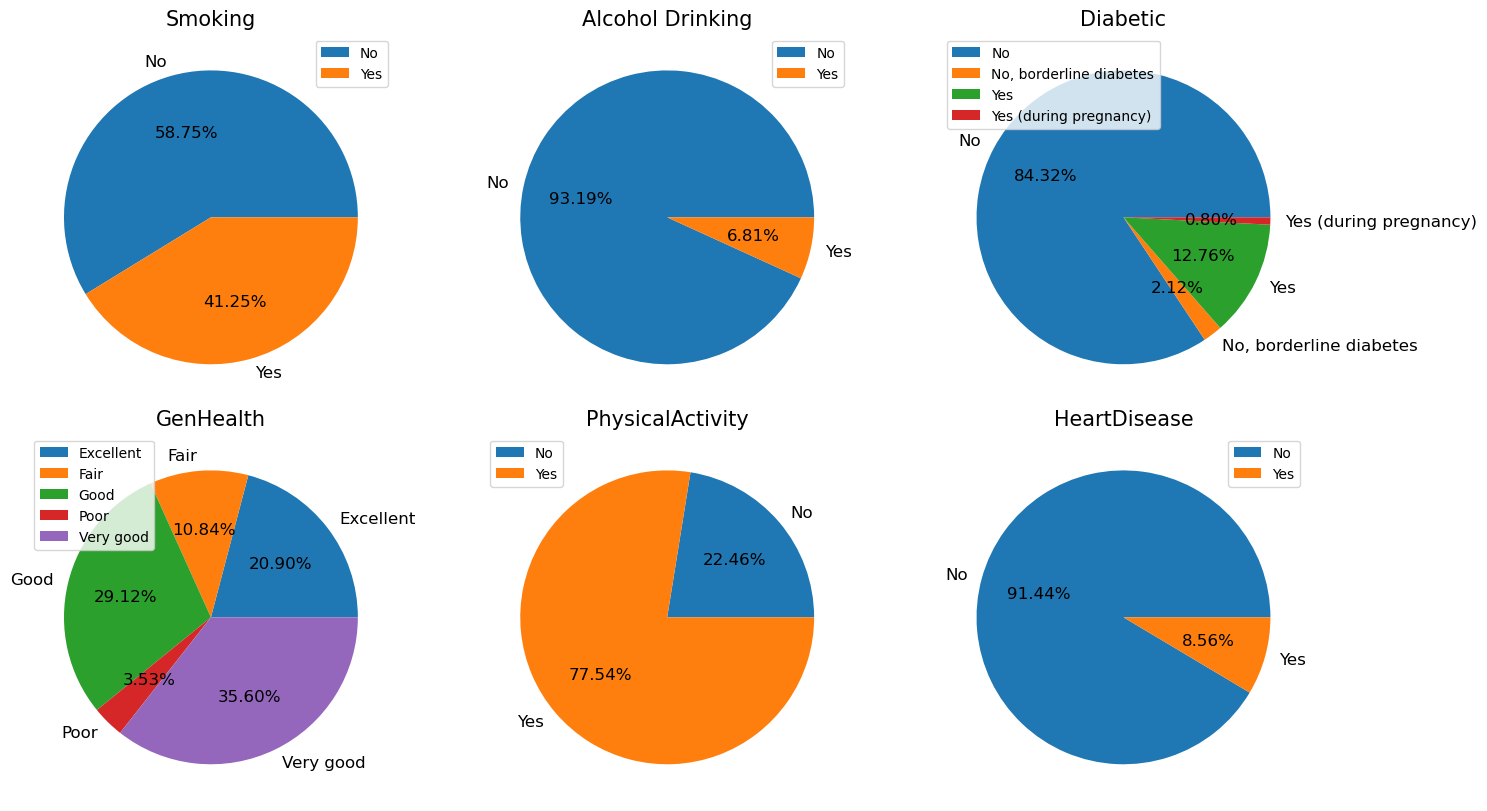

In [8]:
#get pie graphs of the categorical features to analyze the data distribution

fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(15, 8),constrained_layout=True)

##Smoking

X_Smoking = df_heart.groupby('Smoking').size().reset_index(name='Counts')['Smoking']
Y_Smoking = df_heart.groupby('Smoking').size().reset_index(name='Counts')['Counts']
ax1.pie(Y_Smoking, labels = X_Smoking, autopct='%.2f%%',textprops={'fontsize': 12})
ax1.set_title('Smoking', fontsize=15)
ax1.legend()

## Alcohol Drinking

X_Alcohol = df_heart.groupby('AlcoholDrinking').size().reset_index(name='Counts')['AlcoholDrinking']
Y_Alcohol = df_heart.groupby('AlcoholDrinking').size().reset_index(name='Counts')['Counts']
ax2.pie(Y_Alcohol, labels = X_Alcohol, autopct='%.2f%%',textprops={'fontsize': 12})
ax2.set_title('Alcohol Drinking', fontsize=15)
ax2.legend()

## Diabetic

X_Diabetic = df_heart.groupby('Diabetic').size().reset_index(name='Counts')['Diabetic']
Y_Diabetic = df_heart.groupby('Diabetic').size().reset_index(name='Counts')['Counts']
ax3.pie(Y_Diabetic, labels = X_Diabetic, autopct='%.2f%%',textprops={'fontsize': 12})
ax3.set_title('Diabetic', fontsize=15)
ax3.legend(loc='upper left')

## GenHealth

X_GenHealth = df_heart.groupby('GenHealth').size().reset_index(name='Counts')['GenHealth']
Y_GenHealth = df_heart.groupby('GenHealth').size().reset_index(name='Counts')['Counts']
ax4.pie(Y_GenHealth, labels = X_GenHealth, autopct='%.2f%%',textprops={'fontsize': 12})
ax4.set_title('GenHealth', fontsize=15)
ax4.legend(loc='upper left')

## PhysicalActivity

X_PhysicalActivity = df_heart.groupby('PhysicalActivity').size().reset_index(name='Counts')['PhysicalActivity']
Y_PhysicalActivity = df_heart.groupby('PhysicalActivity').size().reset_index(name='Counts')['Counts']
ax5.pie(Y_PhysicalActivity, labels = X_PhysicalActivity, autopct='%.2f%%',textprops={'fontsize': 12})
ax5.set_title('PhysicalActivity', fontsize=15)
ax5.legend()


## HeartDisease

X_HeartDisease = df_heart.groupby('HeartDisease').size().reset_index(name='Counts')['HeartDisease']
Y_HeartDisease = df_heart.groupby('HeartDisease').size().reset_index(name='Counts')['Counts']
ax6.pie(Y_HeartDisease, labels = X_HeartDisease, autopct='%.2f%%',textprops={'fontsize': 12})
ax6.set_title('HeartDisease', fontsize=15)
ax6.legend()

The majority of people in the heart disease dataset have good health habits, such as not smoking, drinking alcohol occasionally, and exercising regularly. However, there is a smaller number of people who have poor health habits, such as smoking regularly, drinking heavily, and not exercising. People can reduce their risk of heart disease by avoiding these poor health habits.

Reference - https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [9]:
## let's analyze the data with in the Heart Disease reported 

df_hd_yes = df_heart[df_heart["HeartDisease"]=='Yes']
df_hd_yes

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6.0,Yes,No,No
319767,Yes,36.21,Yes,No,No,0.0,0.0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8.0,No,No,No
319781,Yes,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No


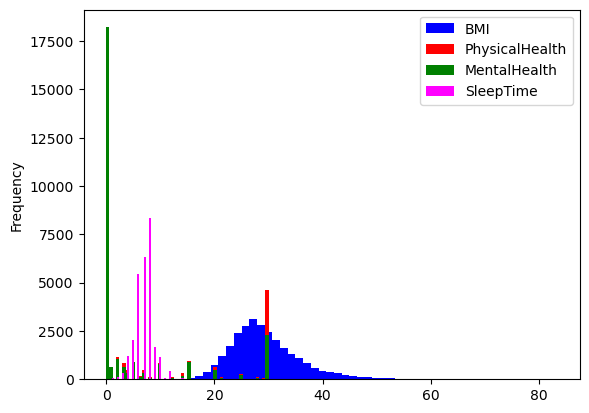

In [10]:
## Analysis of the factors when respondants report heart disease

fig, (ax1) = plt.subplots()
#plt.style.use('ggplot')

ax1.hist(df_hd_yes["BMI"], bins=50,color="Blue", label="BMI")
#ax1.hist(df_heart[df_heart["HeartDisease"]=='No']["BMI"], bins=50, color="Green",alpha=0.3, label="No HeartDisease")
ax1.hist(df_hd_yes["PhysicalHealth"], bins=50,color="Red", label="PhysicalHealth")
ax1.hist(df_hd_yes["MentalHealth"], bins=50,color="Green", label="MentalHealth")
ax1.hist(df_hd_yes["SleepTime"], bins=50,color="Magenta", label="SleepTime")
#ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency")
ax1.legend()


The visualization shows that respondents with heart disease are more likely to have a higher BMI, lower Physical Health scores, lower Mental Health scores, and shorter Sleep Time than the general population.

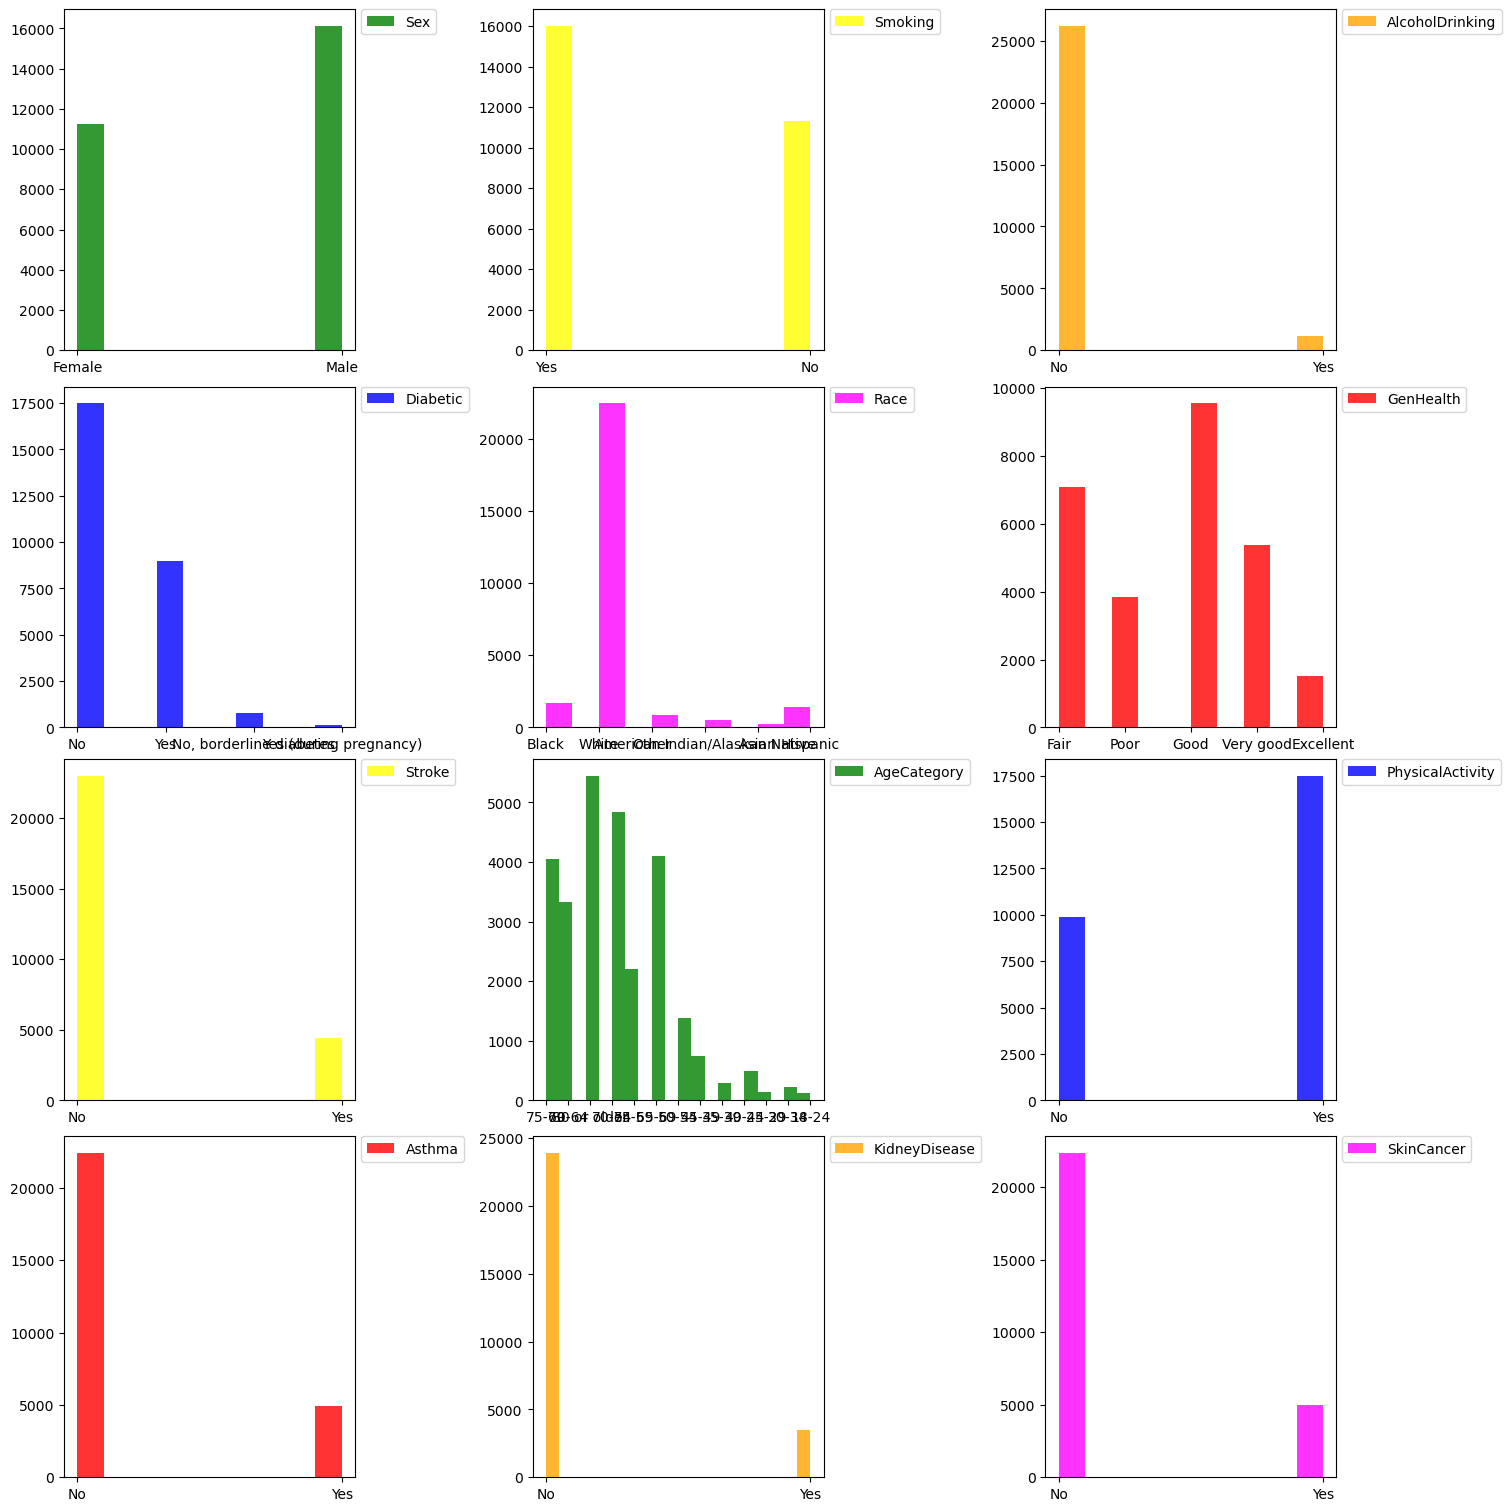

In [11]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4, 3, figsize=(15, 15),constrained_layout=True)

ax1.hist(df_hd_yes["Sex"], bins=10, alpha=0.8, color="Green", label="Sex")
ax1.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax2.hist(df_hd_yes["Smoking"], bins=10, alpha=0.8, color="Yellow", label="Smoking")
ax2.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax3.hist(df_hd_yes["AlcoholDrinking"], bins=10, alpha=0.8, color="Orange", label="AlcoholDrinking")
ax3.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax4.hist(df_hd_yes["Diabetic"], bins=10, alpha=0.8, color="Blue", label="Diabetic")
ax4.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax5.hist(df_hd_yes["Race"], bins=10, alpha=0.8, color="Magenta", label="Race")
ax5.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax6.hist(df_hd_yes["GenHealth"], bins=10, alpha=0.8, color="Red", label="GenHealth")
ax6.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax7.hist(df_hd_yes["Stroke"], bins=10, alpha=0.8, color="Yellow", label="Stroke")
ax7.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax8.hist(df_hd_yes["AgeCategory"], bins=20, alpha=0.8, color="Green", label="AgeCategory")
ax8.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax9.hist(df_hd_yes["PhysicalActivity"], bins=10, alpha=0.8, color="Blue", label="PhysicalActivity")
ax9.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax10.hist(df_hd_yes["Asthma"], bins=10, alpha=0.8, color="Red", label="Asthma")
ax10.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax11.hist(df_hd_yes["KidneyDisease"], bins=20, alpha=0.8, color="Orange", label="KidneyDisease")
ax11.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

ax12.hist(df_hd_yes["SkinCancer"], bins=10, alpha=0.8, color="Magenta", label="SkinCancer")
ax12.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

These findings suggest that there are certain risk factors that are more common among people with heart disease, such as being female, having fair or poor general health, and being in an older age category. However, it is important to note that these are just general trends, and there are many people with heart disease who do not fit into these categories.

It is also important to note that this visualization only shows the distribution of categorical features. It does not show the relationship between these features and heart disease. To better understand the relationship between these features and heart disease, we would need to perform a more detailed statistical analysis.

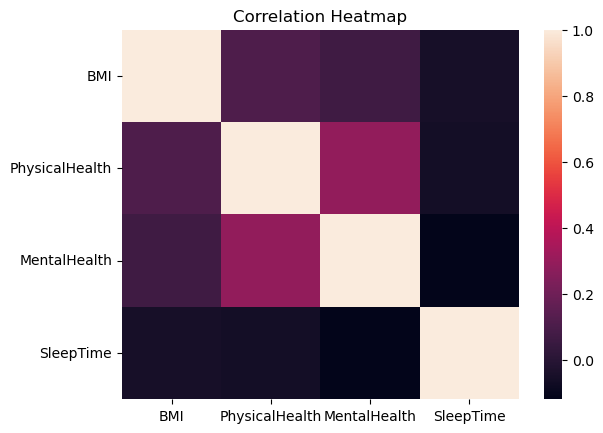

In [12]:
# Use Seaborn to create a correlation heatmap to review for possible relationships
ax = plt.axes()
sns.heatmap(df_heart.corr(), ax = ax)
ax.set_title('Correlation Heatmap')
plt.show()

There does not seem to be any correlation between the features.

Further analysis and transfomation is required to build the prediction model. As stated earlier, this dataset is highly unbalanced. 
This exercise has provided valuable information about all the features and a direction towards data prepping and transformations required. The building of the best model to predict the Heart disease will depend on the balancing of the data and selecting relevant and significant features.

In [13]:
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [14]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

There are no null values in the dataset. All columns seem like they are required features.

The dataset comprises 319,795 entries with 18 columns. Key attributes include 'HeartDisease' as the target variable, 'BMI' as a continuous feature, and various categorical features such as 'Smoking,' 'AlcoholDrinking,' 'Stroke,' 'DiffWalking,' 'Sex,' 'AgeCategory,' 'Race,' 'Diabetic,' 'PhysicalActivity,' 'GenHealth,' 'Asthma,' 'KidneyDisease,' and 'SkinCancer.'

Notably, there are no missing values in any column, and the dataset utilizes both float64 and object data types. The memory usage for the DataFrame is approximately 43.9 MB.

In [15]:
## Find the number of Unique values in the categorical columns
df_heart.nunique() 

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

Binary Categories:

'HeartDisease,' 'Smoking,' 'AlcoholDrinking,' 'Stroke,' 'DiffWalking,' 'Sex,' 'PhysicalActivity,' 'Asthma,' 'KidneyDisease,' and 'SkinCancer' all have 2 unique values, indicating binary categories.

Multiclass Categories:

'AgeCategory' has 13 unique values, 'Race' has 6 unique values, 'Diabetic' has 4 unique values, and 'GenHealth' has 5 unique values, suggesting multiclass categorical variables.
Continuous Variables:

'BMI' has a substantial 3604 unique values, indicating a wide range of body mass index values.
'PhysicalHealth,' 'MentalHealth,' and 'SleepTime' have 31, 31, and 24 unique values, respectively, suggesting a broader spectrum of numerical data.

In [16]:
## converting categorical values to 0 and 1

df_heart_clean = df_heart.copy()

for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 
            'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    df_heart_clean[col] = df_heart_clean[col].apply(lambda x: 1 if x == 'Yes' else 0)

df_heart_clean.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [17]:
print('Unique values for Race: ', df_heart['Race'].unique() )
print('Unique values for Diabetic: ', df_heart['Diabetic'].unique() )
print('Unique values for GenHealth: ', df_heart['GenHealth'].unique() )

Unique values for Race:  ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Unique values for Diabetic:  ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique values for GenHealth:  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [18]:
## Create Dummies for the categorical columns that have more than 2 values

df_heart_clean_dum = pd.get_dummies(df_heart_clean, columns=['Race', 'Diabetic', 'GenHealth'])
df_heart_clean_dum.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,...,1,1,0,0,0,0,0,0,0,1


In [19]:
print('Number of respondents with/without heart disease: \n', (df_heart_clean_dum['HeartDisease']).value_counts())


Number of respondents with/without heart disease: 
 0    292422
1     27373
Name: HeartDisease, dtype: int64


The dataset exhibits an imbalance in the number of samples for individuals with and without Heart Disease. Specifically:

No Heart Disease (Class 0): 292,422 respondents
Heart Disease (Class 1): 27,373 respondents

To address this imbalance, oversampling techniques can be employed to ensure a more equitable representation of both classes. This rebalancing is essential for training models that accurately generalize across both outcomes.

In [20]:
class_0 = df_heart_clean_dum[df_heart_clean_dum['HeartDisease'] == 0]
class_1 = df_heart_clean_dum[df_heart_clean_dum['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
df_heart_balanced = pd.concat([class_0, class_1], axis=0)

print('Data in Heart Dataset:')
print(df_heart_balanced['HeartDisease'].value_counts())

Data in Heart Dataset:
0    292422
1    292422
Name: HeartDisease, dtype: int64


No Heart Disease (Class 0): 292,422 samples

Heart Disease (Class 1): 29,242 samples

This indicates a balanced dataset after oversampling, with an equal number of samples for both classes. Achieving balance is crucial for training models that can effectively learn patterns and make accurate predictions for both outcomes.

In [21]:
##df_heart_balanced.info()

With varying ranges of continuous features, the approach involves scaling them to a standardized range of 0 to 1. This is achieved by dividing each feature by its respective maximum value

In [22]:
## making ageCategory a continuous feature - 
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df_heart_balanced['AgeCategory'] = df_heart_balanced['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df_heart_balanced['AgeCategory'] = df_heart_balanced['AgeCategory'].astype('float')




In [23]:
## scaling the continuous columns
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    df_heart_balanced[col] = df_heart_balanced[col]/df_heart_balanced[col].max()

In [24]:
# Integer encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df_heart_balanced[col].dtype == 'O':
        le = LabelEncoder()
        df_heart_balanced[col] = le.fit_transform(df_heart_balanced[col])

In [25]:
df_heart_balanced.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0.175013,1,0,0,0.100000,1.0,0,0,0.7125,...,1,0,0,1,0,0,0,0,0,1
1,0,0.214444,0,0,1,0.000000,0.0,0,0,1.0000,...,1,1,0,0,0,0,0,0,0,1
2,0,0.280232,1,0,0,0.666667,1.0,0,1,0.8375,...,1,0,0,1,0,0,1,0,0,0
3,0,0.255245,0,0,0,0.000000,0.0,0,0,0.9625,...,1,1,0,0,0,0,0,1,0,0
4,0,0.249974,0,0,0,0.933333,0.0,1,0,0.5250,...,1,1,0,0,0,0,0,0,0,1


## MODEL BUILDING AND EVALUATION

#### The subsequent stage involves partitioning the dataset into training and test sets to facilitate model evaluations.

In [26]:
## split dataset into x_train, y_train, x_test, y_test

## Split data for independent/dependent variables
x = df_heart_balanced.drop(['HeartDisease'], axis=1)
y = df_heart_balanced['HeartDisease']

## Split data into training and test sets (70% training / 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#reset indices in the training and test sets to prevent pandas slicing warnings
x_train = x_train.reset_index(drop = True) #drop + True drops the previous index
x_test = x_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [27]:
#show the sizes of the training and test sets
print(x_train.shape)
print(x_test.shape)

(409390, 29)
(175454, 29)


In [28]:
#see how many Heart Disease respondants are in training and test sets
print('Training set: ')
print(y_train.value_counts())

print('Testing set: ')
print(y_test.value_counts())

Training set: 
0    204811
1    204579
Name: HeartDisease, dtype: int64
Testing set: 
1    87843
0    87611
Name: HeartDisease, dtype: int64


### Logistic Regression Model

In [29]:
#instantiate the logistic regression model 
logreg = LogisticRegression(max_iter=1000)
#fit the model to the training set
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('LogisticRegression - Classification Report: ', classification_report(y_test,y_pred))

LogisticRegression - Classification Report:                precision    recall  f1-score   support

           0       0.77      0.75      0.76     87611
           1       0.76      0.78      0.77     87843

    accuracy                           0.76    175454
   macro avg       0.76      0.76      0.76    175454
weighted avg       0.76      0.76      0.76    175454



Precision: The model's ability to correctly identify positive cases (1) is 76%, and for negative cases (0), it is 77%.

Recall: The model correctly identifies 78% of actual positive cases (1) and 75% of actual negative cases (0).

F1-Score: The harmonic mean of precision and recall is 77% for positive cases (1) and 76% for negative cases (0).

Accuracy: The overall accuracy of the model is 76%, indicating the proportion of correctly predicted instances out of the total.

Macro Avg: The average precision, recall, and F1-score across both classes are all 76%.

Weighted Avg: The weighted average of precision, recall, and F1-score, considering the class imbalance, is also 76%.

### Confusion Matrix

Confusion Matrix:
[[65447 22164]
 [19401 68442]]


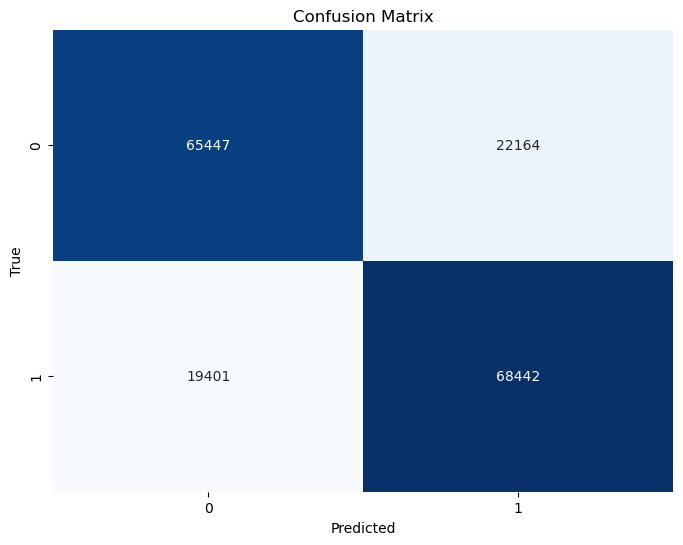

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model to the training set
logreg.fit(x_train, y_train)

# Predict on the test set
y_pred = logreg.predict(x_test)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


True Positives (TP): 68,611 instances correctly predicted as positive.

True Negatives (TN): 65,368 instances correctly predicted as negative.

False Positives (FP): 22,243 instances incorrectly predicted as positive.

False Negatives (FN): 19,232 instances incorrectly predicted as negative.

This suggests a model that is reasonably effective in both identifying positive cases (Heart Disease) and negative cases (No Heart Disease). The balance between true positives and true negatives indicates a well-performing classifier. However, attention may be warranted to minimize false positives and false negatives for further improvement.

### K Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Number of folds for cross-validation
k_folds = 5

# Instantiate the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Implement k-fold cross-validation
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Lists to store results for each fold
precision_class0 = []
recall_class0 = []
f1_class0 = []
precision_class1 = []
recall_class1 = []
f1_class1 = []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kfold.split(x_train), start=1):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model to the training set
    logreg.fit(x_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred_fold = logreg.predict(x_val_fold)

    # Calculate precision, recall, f1-score for each class
    report = classification_report(y_val_fold, y_pred_fold, output_dict=True)

    # Store the results for each fold
    precision_class0.append(report['0']['precision'])
    recall_class0.append(report['0']['recall'])
    f1_class0.append(report['0']['f1-score'])
    precision_class1.append(report['1']['precision'])
    recall_class1.append(report['1']['recall'])
    f1_class1.append(report['1']['f1-score'])

    # Print the classification report for each fold
    print(f'Fold {fold} Classification Report:\n{classification_report(y_val_fold, y_pred_fold)}\n')

# Print the average metrics across all folds for Class 0
print(f'Average Precision for Class 0: {np.mean(precision_class0)}')
print(f'Average Recall for Class 0: {np.mean(recall_class0)}')
print(f'Average F1-Score for Class 0: {np.mean(f1_class0)}')

# Print the average metrics across all folds for Class 1
print(f'Average Precision for Class 1: {np.mean(precision_class1)}')
print(f'Average Recall for Class 1: {np.mean(recall_class1)}')
print(f'Average F1-Score for Class 1: {np.mean(f1_class1)}')


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     40830
           1       0.76      0.78      0.77     41048

    accuracy                           0.76     81878
   macro avg       0.76      0.76      0.76     81878
weighted avg       0.76      0.76      0.76     81878


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     40982
           1       0.76      0.78      0.77     40896

    accuracy                           0.76     81878
   macro avg       0.76      0.76      0.76     81878
weighted avg       0.76      0.76      0.76     81878


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76     40942
           1       0.76      0.78      0.77     40936

    accuracy                           0.77     81878
   macro avg       0.77      0.77   

Across the five folds, the classification reports consistently demonstrate balanced performance with precision, recall, and F1-score around 76-77% for both classes (Heart Disease and No Heart Disease). The model exhibits stability in predicting positive and negative cases.

Class 0 (No Heart Disease): The model maintains an average precision of 77%, recall of 75%, and F1-score of 76%. This indicates its effectiveness in identifying instances without heart disease.

Class 1 (Heart Disease): The model achieves an average precision of 76%, recall of 78%, and F1-score of 77%, highlighting its ability to identify cases with heart disease.

The average performance metrics across all folds reinforce the model's consistency and reliability in predicting heart disease, with an overall accuracy of around 76%.


### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('RandomForestClassifier - Classification Report: ', classification_report(y_test,y_pred))

RandomForestClassifier - Classification Report:                precision    recall  f1-score   support

           0       1.00      0.93      0.96     87611
           1       0.93      1.00      0.96     87843

    accuracy                           0.96    175454
   macro avg       0.97      0.96      0.96    175454
weighted avg       0.97      0.96      0.96    175454



Class 0 (No Heart Disease): The precision is 100%, indicating that all instances predicted as 'No Heart Disease' are indeed accurate. The recall is 93%, and the F1-score is 96%, demonstrating high effectiveness in identifying cases without heart disease.

Class 1 (Heart Disease): The precision is 93%, suggesting that 93% of instances predicted as 'Heart Disease' are accurate. The recall is 100%, and the F1-score is 97%, emphasizing the model's strong ability to identify cases with heart disease.

Overall: The model achieves an impressive accuracy of 96%, with macro and weighted averages for precision, recall, and F1-score at 96-97%. This signifies robust performance in predicting both classes.

#### In conclusion, the Logistic Regression model demonstrates a reasonable accuracy of 76%, providing balanced performance across precision, recall, and F1-score for both classes. However, the RandomForestClassifier outshines with an outstanding accuracy of 97%, showcasing exceptional precision, recall, and F1-score.

#### The RandomForestClassifier is the preferred choice due to its significantly higher accuracy, making it more reliable for predicting heart disease. The stark contrast in performance indicates the RandomForestClassifier's superiority, highlighting its effectiveness in handling the complexities of the dataset.